In [ ]:
import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [ ]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [ ]:
df = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/msleep.csv')

In [ ]:
print(df)

    sleep_total  sleep_rem  awake  brainwt   bodywt
3          14.9        2.3    9.1  0.00029    0.019
4           4.0        0.7   20.0  0.42300  600.000
8          10.1        2.9   13.9  0.07000   14.000
11          9.4        0.8   14.6  0.00550    0.728
13         12.5        1.5   11.5  0.00640    0.420
16          9.1        1.4   14.9  0.00014    0.005
17         17.4        3.1    6.6  0.01080    3.500
19         18.0        4.9    6.0  0.00630    1.700
21         19.7        3.9    4.3  0.00030    0.023
22          2.9        0.6   21.1  0.65500  521.000
24         10.1        3.5   13.9  0.00350    0.770
27         12.5        3.2   11.5  0.02560    3.300
39         14.3        3.1    9.7  0.00100    0.120
41         12.5        1.4   11.5  0.00040    0.022
47          8.4        0.9   15.6  0.01210    2.500
63         13.0        2.4   11.0  0.00190    0.320
66          8.4        2.1   15.6  0.00120    0.075
70         13.8        3.4   10.2  0.00400    0.101
73          

**Select all rows and column 1 from dataset to x and all rows and column 2 as y **

** Fit Random forest regressor to the dataset **

In [ ]:
df.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


**Data Preparation**

In [ ]:
df.dropna(inplace= True )

In [ ]:
df=df.drop(['name','genus','vore','order','conservation','sleep_cycle'],axis=1)
xVars=df.drop('sleep_total',axis=1)
yVars=df[['sleep_total']]
xTrain,xValid,yTrain,yValid=train_test_split(xVars,yVars,test_size=0.3,random_state=42)


**Model Random Forest Regression**

In [ ]:
regressor=RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
regressor.fit(xTrain,yTrain)

<ipython-input-30-43200b48714b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(xTrain,yTrain)


RandomForestRegressor(n_estimators=1000, random_state=42)

**Check Point**

In [ ]:
y_pred=regressor.predict(xValid)

In [ ]:
y_pred

array([13.466 , 13.7897, 12.7225,  3.9829, 15.7586,  8.9401])

In [ ]:
y_pred=pd.DataFrame(y_pred,columns=['yPredict'])

In [ ]:
y_pred

,yPredict
0,13.4660
1,13.7897
2,12.7225
3,3.9829
4,15.7586
5,8.9401


In [ ]:
yValid

,sleep_total
3,14.9
70,13.8
63,13.0
4,4.0
21,19.7
16,9.1


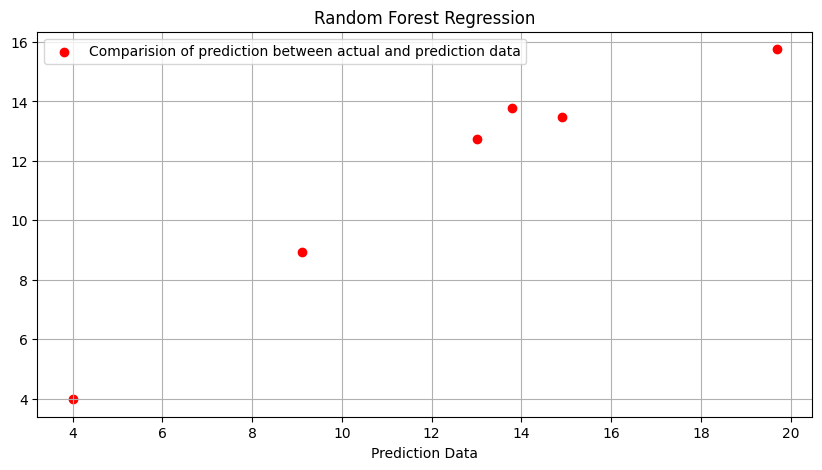

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(yValid,y_pred,color='red',label='Comparision of prediction between actual and prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression')
plt.xlabel('Prediction Data')
plt.ylabel=('Actual Data')
plt.show()



**R Square**

In [ ]:
metrics.r2_score(yValid,y_pred)

0.8765322133860461